In [81]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt
import networkx as nx


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
url = "https://github.com/VeritasYin/STGCN_IJCAI-18/raw/master/dataset/PeMSD7_Full.zip"
data_dir = keras.utils.get_file(origin=url, extract=True, archive_format="zip")
data_dir = data_dir.rstrip("PeMSD7_Full.zip")

route_distances = pd.read_csv(
    os.path.join(data_dir, "PeMSD7_W_1026.csv"), header=None
).to_numpy()
speeds_array = pd.read_csv(os.path.join(data_dir, "PeMSD7_V_1026.csv"), header=None).to_numpy()

print(f"route_distances shape={route_distances.shape}")
print(f"speeds_array shape={speeds_array.shape}")

route_distances shape=(1026, 1026)
speeds_array shape=(12672, 1026)


In [83]:
# import numpy as np


# def random_walk(route_distances, start_node, num_steps):
#     """
#     Perform random walk on a given route.

#     Parameters:
#     - route_distances: 2D numpy array, distance matrix of the route network
#     - start_node: integer, starting node index of the random walk
#     - num_steps: integer, number of steps for the random walk

#     Returns:
#     - route: list of integers, representing the nodes visited during the random walk
#     """
#     route = [start_node]
#     current_node = start_node
    
#     for _ in range(num_steps):
#         possible_next_nodes = np.nonzero(route_distances[current_node])[0]
        
#         if len(possible_next_nodes) == 0:
#             print("No available next nodes. Terminating random walk.")
#             break
        
#         next_node = np.random.choice(possible_next_nodes)
#         route.append(next_node)
#         current_node = next_node
    
#     return route

# import numpy as np

# def deepwalk_random_walk(node_embeddings, start_node, num_steps):
#     """
#     Perform random walk on a given graph using node embeddings from DeepWalk.

#     Parameters:
#     - node_embeddings: 2D numpy array, node embeddings generated by DeepWalk
#     - start_node: integer, starting node index of the random walk
#     - num_steps: integer, number of steps for the random walk

#     Returns:
#     - route: list of integers, representing the nodes visited during the random walk
#     """
#     route = [start_node]
#     current_node = start_node
    
#     for _ in range(num_steps):
#         # Get embeddings of the current node
#         current_embedding = node_embeddings[current_node]
        
#         # Calculate cosine similarities between current node embedding and all other node embeddings
#         similarities = np.dot(node_embeddings, current_embedding) / (np.linalg.norm(node_embeddings, axis=1) * np.linalg.norm(current_embedding))
        
#         # Exclude visited nodes
#         for visited_node in route:
#             similarities[visited_node] = 0
        
#         # Select the next node with the highest similarity
#         next_node = np.argmax(similarities)
        
#         # Add the next node to the route
#         route.append(next_node)
#         current_node = next_node
    
#     return route

# Example usage:
# node_embeddings = ... # Pre-trained node embeddings from DeepWalk
# start_node = ... # Your starting node index
# num_steps = ... # Number of steps for the random walk
# route = deepwalk_random_walk(node_embeddings, start_node, num_steps)
# print("Random Walk Route:", route)


# import numpy as np

# def deepwalk_random_walk(node_embeddings, start_node, num_steps, temperature=1.0):
#     """
#     Perform random walk on a given graph using node embeddings from DeepWalk.

#     Parameters:
#     - node_embeddings: 2D numpy array, node embeddings generated by DeepWalk
#     - start_node: integer, starting node index of the random walk
#     - num_steps: integer, number of steps for the random walk
#     - temperature: float, temperature parameter for softmax function, controls the randomness of the walk

#     Returns:
#     - route: list of integers, representing the nodes visited during the random walk
#     """
#     route = [start_node]
#     current_node = start_node
    
#     for _ in range(num_steps):
#         # Get embeddings of the current node
#         current_embedding = node_embeddings[current_node]
        
#         # Calculate cosine similarities between current node embedding and all other node embeddings
#         similarities = np.dot(node_embeddings, current_embedding) / (np.linalg.norm(node_embeddings, axis=1) * np.linalg.norm(current_embedding))
        
#         # Exclude visited nodes
#         for visited_node in route:
#             similarities[visited_node] = 0
        
#         # Apply softmax to convert similarities to probabilities
#         probabilities = np.exp(similarities / temperature) / np.sum(np.exp(similarities / temperature))
        
#         # Select the next node based on the probability distribution
#         next_node = np.random.choice(len(probabilities), p=probabilities)
        
#         # Add the next node to the route
#         route.append(next_node)
#         current_node = next_node
    
#     return route

import numpy as np

def relu(x):
    """Rectified Linear Unit (ReLU) activation function."""
    return np.maximum(0, x)

def deepwalk_random_walk(node_embeddings, start_node, num_steps, activation_function=relu):
    """
    Perform random walk on a given graph using node embeddings from DeepWalk.

    Parameters:
    - node_embeddings: 2D numpy array, node embeddings generated by DeepWalk
    - start_node: integer, starting node index of the random walk
    - num_steps: integer, number of steps for the random walk
    - activation_function: function, non-linear activation function to apply to node embeddings

    Returns:
    - route: list of integers, representing the nodes visited during the random walk
    """
    route = [start_node]
    current_node = start_node
    
    for _ in range(num_steps):
        # Get embeddings of the current node and apply activation function
        current_embedding = activation_function(node_embeddings[current_node])
        
        # Calculate cosine similarities between current node embedding and all other node embeddings
        similarities = np.dot(node_embeddings, current_embedding) / (np.linalg.norm(node_embeddings, axis=1) * np.linalg.norm(current_embedding))
        
        # Exclude visited nodes
        for visited_node in route:
            similarities[visited_node] = 0
        
        # Select the next node with the highest similarity
        next_node = np.argmax(similarities)
        
        # Add the next node to the route
        route.append(next_node)
        current_node = next_node
    
    return route




In [84]:
# import numpy as np

# def softmax(x):
#     """Softmax activation function."""
#     exp_scores = np.exp(x - np.max(x))
#     return exp_scores / np.sum(exp_scores)

# def deepwalk_random_walk(node_embeddings, start_node, num_steps):
#     """
#     Perform random walk on a given graph using node embeddings from DeepWalk.

#     Parameters:
#     - node_embeddings: 2D numpy array, node embeddings generated by DeepWalk
#     - start_node: integer, starting node index of the random walk
#     - num_steps: integer, number of steps for the random walk

#     Returns:
#     - route: list of integers, representing the nodes visited during the random walk
#     """
#     route = [start_node]
#     current_node = start_node
    
#     for _ in range(num_steps):
#         # Get embeddings of the current node and apply softmax activation function
#         current_embedding = softmax(node_embeddings[current_node])
        
#         # Calculate cosine similarities between current node embedding and all other node embeddings
#         similarities = np.dot(node_embeddings, current_embedding)
        
#         # Exclude visited nodes
#         for visited_node in route:
#             similarities[visited_node] = 0
        
#         # Select the next node with the highest similarity
#         next_node = np.argmax(similarities)
        
#         # Add the next node to the route
#         route.append(next_node)
#         current_node = next_node
    
#     return route


In [85]:
sample_routes = [
    0,
    1,
    4,
    7,
    8,
    11,
    15,
    108,
    109,
    114,
    115,
    118,
    120,
    123,
    124,
    126,
    127,
    129,
    130,
    132,
    133,
    136,
    139,
    144,
    147,
    216,
    228,
    280,
    281,
    350,
    351,
    386,
    447,
    448,
    473,
    569,
    570,
    592,
    611,
    612,
    628,
    712,
    713,
    800,
    872,
    873,
    949,
    950,
    991,
    1016
]
num_routes = len(sample_routes)
num_sample_routes = 50
num_steps = 50


generated_routes = []
for i in range(num_sample_routes):
    sample_route_index = np.random.randint(num_routes)
    start_node = sample_routes[sample_route_index]
    route = deepwalk_random_walk(route_distances, start_node, num_steps)
    generated_routes.append(route)


for i in range(5):
    print(f"Generated Route {i+1}: {generated_routes[i]}")
sample_routes = generated_routes[3]
route_distances = route_distances[np.ix_(sample_routes, sample_routes)]
speeds_array = speeds_array[:, sample_routes]



print(f"route_distances shape={route_distances.shape}")
print(f"speeds_array shape={speeds_array.shape}")

Generated Route 1: [1, 52, 27, 56, 12, 24, 19, 31, 38, 36, 29, 9, 5, 3, 46, 830, 18, 55, 855, 832, 836, 835, 839, 833, 847, 854, 826, 856, 427, 423, 447, 422, 859, 842, 838, 846, 844, 468, 454, 463, 460, 441, 418, 425, 429, 420, 437, 435, 472, 431, 450]
Generated Route 2: [872, 939, 1001, 890, 1017, 964, 880, 926, 991, 866, 950, 929, 882, 932, 975, 992, 958, 1021, 920, 923, 947, 875, 470, 449, 428, 440, 446, 436, 455, 465, 471, 464, 424, 453, 448, 466, 456, 417, 457, 191, 183, 187, 179, 171, 184, 169, 201, 186, 173, 197, 180]
Generated Route 3: [1, 52, 27, 56, 12, 24, 19, 31, 38, 36, 29, 9, 5, 3, 46, 830, 18, 55, 855, 832, 836, 835, 839, 833, 847, 854, 826, 856, 427, 423, 447, 422, 859, 842, 838, 846, 844, 468, 454, 463, 460, 441, 418, 425, 429, 420, 437, 435, 472, 431, 450]
Generated Route 4: [1, 52, 27, 56, 12, 24, 19, 31, 38, 36, 29, 9, 5, 3, 46, 830, 18, 55, 855, 832, 836, 835, 839, 833, 847, 854, 826, 856, 427, 423, 447, 422, 859, 842, 838, 846, 844, 468, 454, 463, 460, 441, 418, 

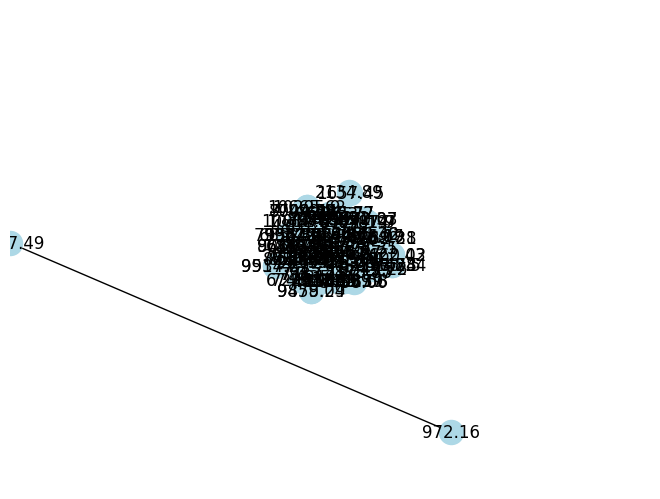

In [86]:
G = nx.Graph()

for row in route_distances:
    source, destination, distance = row[0], row[1], row[2]

    G.add_node(source)
    G.add_node(destination)

    G.add_edge(source, destination, weight=distance)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

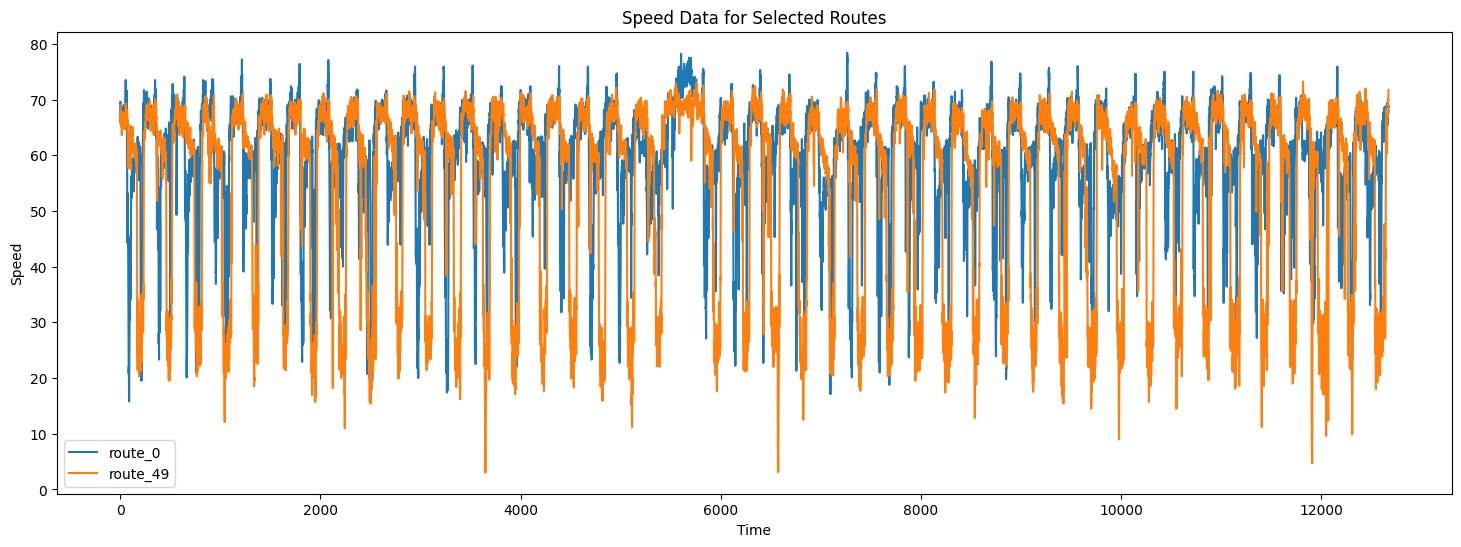

In [87]:
plt.figure(figsize=(18, 6))
plt.plot(speeds_array[:, [0, -1]])
plt.legend(["route_0", "route_49"])
plt.xlabel("Time")
plt.ylabel("Speed")
plt.title("Speed Data for Selected Routes")
plt.show()

Text(0, 0.5, 'road number')

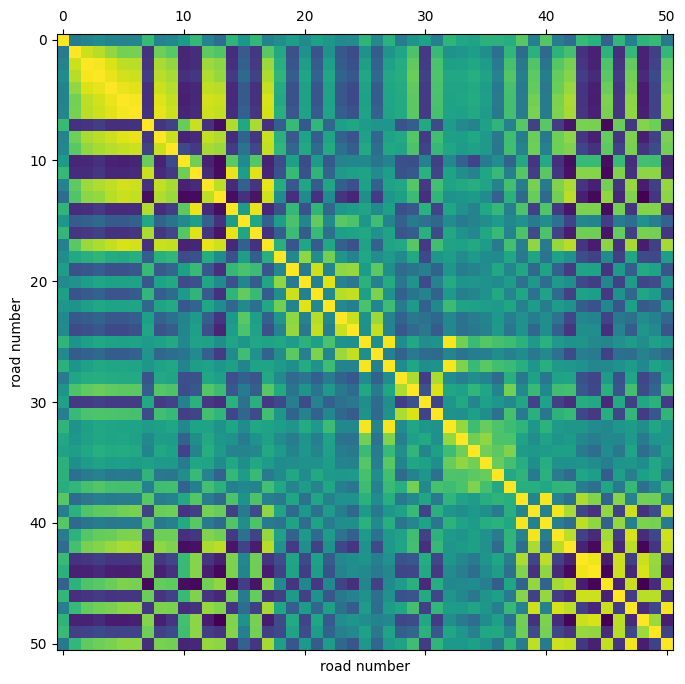

In [88]:
plt.figure(figsize=(8, 8))
plt.matshow(np.corrcoef(speeds_array.T), 0)
plt.xlabel("road number")
plt.ylabel("road number")

In [89]:
import numpy as np

def preprocess(data_array: np.ndarray, train_size: float, val_size: float):
    """
    Preprocesses the input data array into training, validation, and test sets.

    Parameters:
    data_array (np.ndarray): Input data array.
    train_size (float): Size of the training set (between 0 and 1).
    val_size (float): Size of the validation set (between 0 and 1).

    Returns:
    np.ndarray, np.ndarray, np.ndarray: Tuple containing the preprocessed training,
    validation, and test sets.
    """
    assert isinstance(data_array, np.ndarray), "Input data_array must be a NumPy array"
    assert 0 < train_size < 1, "train_size must be between 0 and 1"
    assert 0 < val_size < 1, "val_size must be between 0 and 1"

    num_time_steps = data_array.shape[0]
    num_train, num_val = (
        int(num_time_steps * train_size),
        int(num_time_steps * val_size),
    )
    train_array = data_array[:num_train]
    mean, std = train_array.mean(axis=0), train_array.std(axis=0)

    train_array = (train_array - mean) / std
    val_array = (data_array[num_train : (num_train + num_val)] - mean) / std
    test_array = (data_array[(num_train + num_val) :] - mean) / std

    return train_array, val_array, test_array

train_size, val_size = 0.7, 0.15
train_array, val_array, test_array = preprocess(speeds_array, train_size, val_size)

print(f"train set size: {train_array.shape}")
print(f"validation set size: {val_array.shape}")
print(f"test set size: {test_array.shape}")


train set size: (8870, 51)
validation set size: (1900, 51)
test set size: (1902, 51)


In [90]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

batch_size = 64
input_sequence_length = 12
forecast_horizon = 3
multi_horizon = False


def create_tf_dataset(
    data_array: np.ndarray,
    input_sequence_length: int,
    forecast_horizon: int,
    batch_size: int = 128,
    shuffle=True,
    multi_horizon=True,
):
    """Creates tensorflow dataset from numpy array.

    This function creates a dataset where each element is a tuple `(inputs, targets)`.
    `inputs` is a Tensor
    of shape `(batch_size, input_sequence_length, num_routes, 1)` containing
    the `input_sequence_length` past values of the timeseries for each node.
    `targets` is a Tensor of shape `(batch_size, forecast_horizon, num_routes)`
    containing the `forecast_horizon`
    future values of the timeseries for each node.

    Args:
        data_array: np.ndarray with shape `(num_time_steps, num_routes)`
        input_sequence_length: Length of the input sequence (in number of timesteps).
        forecast_horizon: If `multi_horizon=True`, the target will be the values of the timeseries for 1 to
            `forecast_horizon` timesteps ahead. If `multi_horizon=False`, the target will be the value of the
            timeseries `forecast_horizon` steps ahead (only one value).
        batch_size: Number of timeseries samples in each batch.
        shuffle: Whether to shuffle output samples, or instead draw them in chronological order.
        multi_horizon: See `forecast_horizon`.

    Returns:
        A tf.data.Dataset instance.
    """

    inputs = timeseries_dataset_from_array(
        np.expand_dims(data_array[:-forecast_horizon], axis=-1),
        None,
        sequence_length=input_sequence_length,
        shuffle=False,
        batch_size=batch_size,
    )

    target_offset = (
        input_sequence_length
        if multi_horizon
        else input_sequence_length + forecast_horizon - 1
    )
    target_seq_length = forecast_horizon if multi_horizon else 1
    targets = timeseries_dataset_from_array(
        data_array[target_offset:],
        None,
        sequence_length=target_seq_length,
        shuffle=False,
        batch_size=batch_size,
    )

    dataset = tf.data.Dataset.zip((inputs, targets))
    if shuffle:
        dataset = dataset.shuffle(100)

    return dataset.prefetch(16).cache()


train_dataset, val_dataset = (
    create_tf_dataset(data_array, input_sequence_length, forecast_horizon, batch_size)
    for data_array in [train_array, val_array]
)

test_dataset = create_tf_dataset(
    test_array,
    input_sequence_length,
    forecast_horizon,
    batch_size=test_array.shape[0],
    shuffle=False,
    multi_horizon=multi_horizon,
)

In [91]:
def compute_adjacency_matrix(
    route_distances: np.ndarray, sigma2: float, epsilon: float
):
    num_routes = route_distances.shape[0]
    route_distances = route_distances / 10000.0
    w2, w_mask = (
        route_distances * route_distances,
        np.ones([num_routes, num_routes]) - np.identity(num_routes),
    )
    return (np.exp(-w2 / sigma2) >= epsilon) * w_mask

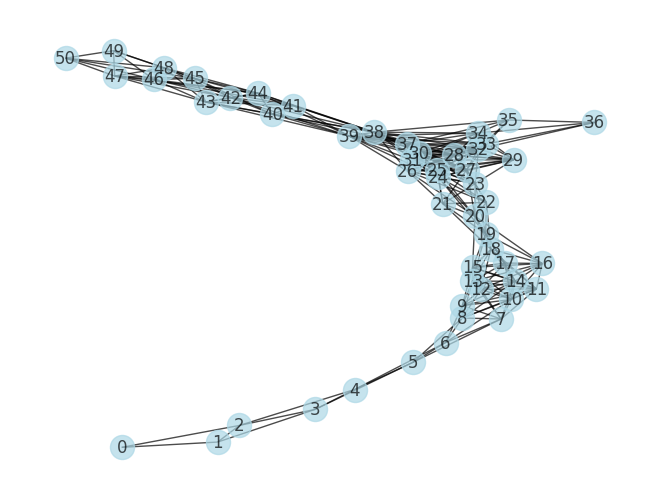

Number of nodes: 51, Number of edges: 520


In [92]:
class GraphInfo:
    def __init__(self, edges: tuple, num_nodes: int):
        self.edges = edges
        self.num_nodes = num_nodes

sigma2 = 0.1
epsilon = 0.7


adjacency_matrix = compute_adjacency_matrix(route_distances, sigma2, epsilon)
node_indices, neighbor_indices = np.where(adjacency_matrix == 1)
G = nx.Graph()

for node, neighbor in zip(node_indices, neighbor_indices):
    G.add_edge(node, neighbor)

pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='black',
    alpha=0.7
)
plt.show()

graph = GraphInfo(
    edges=(node_indices.tolist(), neighbor_indices.tolist()),
    num_nodes=adjacency_matrix.shape[0],
)
print(f"Number of nodes: {graph.num_nodes}, Number of edges: {len(graph.edges[0])}")

In [93]:
class GraphConv(layers.Layer):
    def __init__(
        self,
        in_feat,
        out_feat,
        graph_info: GraphInfo,
        aggregation_type="mean",
        combination_type="concat",
        activation: typing.Optional[str] = None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.in_feat = in_feat
        self.out_feat = out_feat
        self.graph_info = graph_info
        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.weight = tf.Variable(
            initial_value=keras.initializers.glorot_uniform()(
                shape=(in_feat, out_feat), dtype="float32"
            ),
            trainable=True,
        )
        self.activation = layers.Activation(activation)

    def aggregate(self, neighbour_representations: tf.Tensor):
        aggregation_func = {
            "sum": tf.math.unsorted_segment_sum,
            "mean": tf.math.unsorted_segment_mean,
            "max": tf.math.unsorted_segment_max,
        }.get(self.aggregation_type)

        if aggregation_func:
            return aggregation_func(
                neighbour_representations,
                self.graph_info.edges[0],
                num_segments=self.graph_info.num_nodes,
            )

        raise ValueError(f"Invalid aggregation type: {self.aggregation_type}")

    def compute_nodes_representation(self, features: tf.Tensor):
        """Computes each node's representation.

        The nodes' representations are obtained by multiplying the features tensor with
        `self.weight`. Note that
        `self.weight` has shape `(in_feat, out_feat)`.


        Returns:
            A tensor of shape `(num_nodes, batch_size, input_seq_len, out_feat)`
        """
        return tf.matmul(features, self.weight)

    def compute_aggregated_messages(self, features: tf.Tensor):
        neighbour_representations = tf.gather(features, self.graph_info.edges[1])
        aggregated_messages = self.aggregate(neighbour_representations)
        return tf.matmul(aggregated_messages, self.weight)

    def update(self, nodes_representation: tf.Tensor, aggregated_messages: tf.Tensor):
        if self.combination_type == "concat":
            h = tf.concat([nodes_representation, aggregated_messages], axis=-1)
        elif self.combination_type == "add":
            h = nodes_representation + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        return self.activation(h)

    def call(self, features: tf.Tensor):
        """Forward pass.

        Args:
            features: tensor of shape `(num_nodes, batch_size, input_seq_len, in_feat)`

        Returns:
            A tensor of shape `(num_nodes, batch_size, input_seq_len, out_feat)`
        """
        nodes_representation = self.compute_nodes_representation(features)
        aggregated_messages = self.compute_aggregated_messages(features)
        return self.update(nodes_representation, aggregated_messages)

In [94]:
class LSTMGC(layers.Layer):
    """Layer comprising a convolution layer followed by LSTM and dense layers."""

    def __init__(
        self,
        in_feat,
        out_feat,
        lstm_units: int,
        input_seq_len: int,
        output_seq_len: int,
        graph_info: GraphInfo,
        graph_conv_params: typing.Optional[dict] = None,
        **kwargs,
    ):
        super().__init__(**kwargs)

        # graph conv layer
        if graph_conv_params is None:
            graph_conv_params = {
                "aggregation_type": "mean",
                "combination_type": "concat",
                "activation": None,
            }
        self.graph_conv = GraphConv(in_feat, out_feat, graph_info, **graph_conv_params)

        self.lstm = layers.LSTM(lstm_units, activation="relu")
        self.dense = layers.Dense(output_seq_len)

        self.input_seq_len, self.output_seq_len = input_seq_len, output_seq_len

    def call(self, inputs):
        """Forward pass.

        Args:
            inputs: tf.Tensor of shape `(batch_size, input_seq_len, num_nodes, in_feat)`

        Returns:
            A tensor of shape `(batch_size, output_seq_len, num_nodes)`.
        """

        # convert shape to  (num_nodes, batch_size, input_seq_len, in_feat)
        inputs = tf.transpose(inputs, [2, 0, 1, 3])

        gcn_out = self.graph_conv(
            inputs
        )  # gcn_out has shape: (num_nodes, batch_size, input_seq_len, out_feat)
        shape = tf.shape(gcn_out)
        num_nodes, batch_size, input_seq_len, out_feat = (
            shape[0],
            shape[1],
            shape[2],
            shape[3],
        )

        # LSTM takes only 3D tensors as input
        gcn_out = tf.reshape(gcn_out, (batch_size * num_nodes, input_seq_len, out_feat))
        lstm_out = self.lstm(
            gcn_out
        )  # lstm_out has shape: (batch_size * num_nodes, lstm_units)

        dense_output = self.dense(
            lstm_out
        )  # dense_output has shape: (batch_size * num_nodes, output_seq_len)
        output = tf.reshape(dense_output, (num_nodes, batch_size, self.output_seq_len))
        return tf.transpose(
            output, [1, 2, 0]
        )  # returns Tensor of shape (batch_size, output_seq_len, num_nodes)

In [95]:
in_feat = 1
batch_size = 64
epochs = 20
input_sequence_length = 12
forecast_horizon = 3
multi_horizon = False
out_feat = 10
lstm_units = 64
graph_conv_params = {
    "aggregation_type": "mean",
    "combination_type": "concat",
    "activation": None,
}

st_gcn = LSTMGC(
    in_feat,
    out_feat,
    lstm_units,
    input_sequence_length,
    forecast_horizon,
    graph,
    graph_conv_params,
)
inputs = layers.Input((input_sequence_length, graph.num_nodes, in_feat))
outputs = st_gcn(inputs)

model = keras.models.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    loss=keras.losses.MeanSquaredError(),
)
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.7548 - val_loss: 0.3216
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.2743 - val_loss: 0.1742
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.1658 - val_loss: 0.1314
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.1293 - val_loss: 0.1111
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.1103 - val_loss: 0.0982
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0984 - val_loss: 0.0891
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0905 - val_loss: 0.0833
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0858 - val_loss: 0.0797
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0829 - val_loss: 0.0774
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0812 - val_loss: 0.0760
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0801 - val_loss: 0.0752
Epoch 12/20
139/139 ━━━━━━━━━━

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Model RMSE: 0.3624
Model MAPE: 0.0070
Model MAE: 0.195, Naive MAE: 0.198
naive MSE: 0.13987792241330538, model MSE: 0.1313072049404756


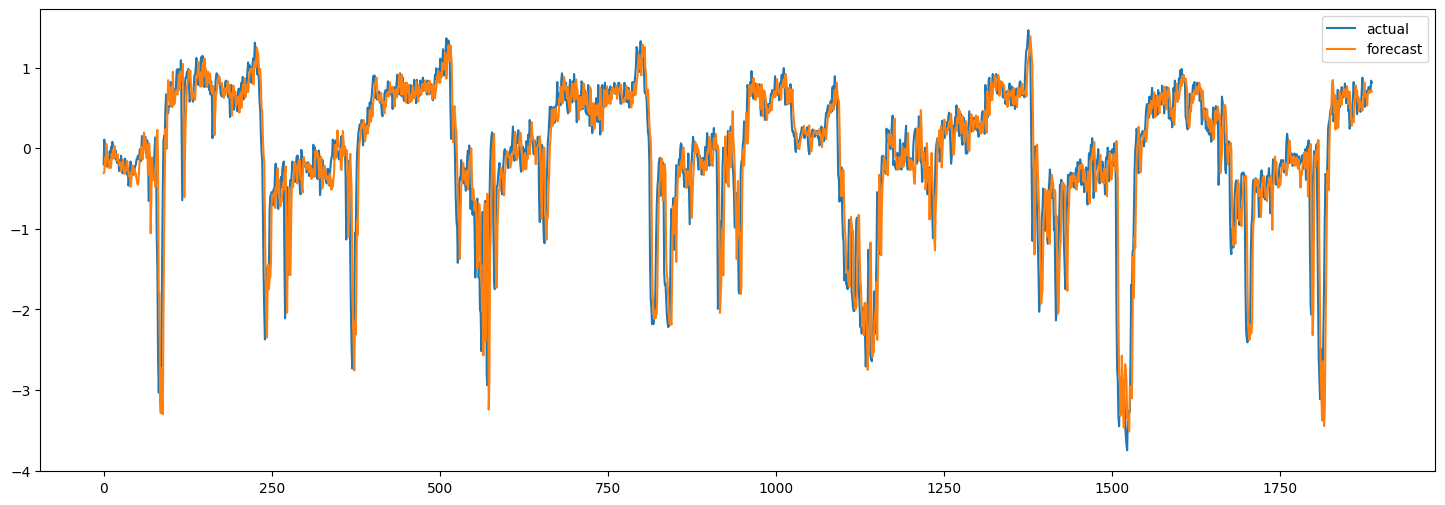

In [96]:
x_test, y = next(test_dataset.as_numpy_iterator())
y_pred = model.predict(x_test)
plt.figure(figsize=(18, 6))
plt.plot(y[:, 0, 0])
plt.plot(y_pred[:, 0, 0])
plt.legend(["actual", "forecast"])

naive_mse, model_mse = (
    np.square(x_test[:, -1, :, 0] - y[:, 0, :]).mean(),
    np.square(y_pred[:, 0, :] - y[:, 0, :]).mean(),
)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(np.square(y_pred[:, 0, :] - y[:, 0, :])))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.abs(np.mean(np.abs((y[:, 0, :] - y_pred[:, 0, :])) / y[:, 0, :]))

nmae = np.abs(x_test[:, -1, :, 0] - y[:, 0, :]).mean()

mae = np.mean(np.abs(y[:, 0, :] - y_pred[:, 0, :]))
# Print RMSE and MAPE
print(f"Model RMSE: {rmse:.4f}")
print(f"Model MAPE: {mape:.4f}")
print(f'Model MAE: {mae:.3f}, Naive MAE: {nmae:.3f}')
print(f"naive MSE: {naive_mse}, model MSE: {model_mse}")